In [1]:
#CNN-Making predictions for at least two images from the Fashion MNIST dataset
import numpy as np
import matplotlib.pyplot as plt
from keras.src.api_export import keras_export
from keras.src.utils.file_utils import get_file
import gzip
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import random

In [2]:
# Load the Fashion-MNIST dataset (from the provided code)
@keras_export("keras.datasets.fashion_mnist.load_data")
def load_data():
    dirname = os.path.join("datasets", "fashion-mnist")
    base = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/"
    files = [
        "train-labels-idx1-ubyte.gz",
        "train-images-idx3-ubyte.gz",
        "t10k-labels-idx1-ubyte.gz",
        "t10k-images-idx3-ubyte.gz",
    ]

In [10]:
paths = []
    for fname in files:
        paths.append(get_file(fname, origin=base + fname, cache_subdir=dirname))

    with gzip.open(paths[0], "rb") as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], "rb") as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(y_train), 28, 28
        )

    with gzip.open(paths[2], "rb") as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], "rb") as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(y_test), 28, 28
        )

    return (x_train, y_train), (x_test, y_test)

IndentationError: unexpected indent (ipython-input-10-522112938.py, line 2)

In [11]:
"""Fashion-MNIST dataset with model training and prediction."""

import numpy as np
import matplotlib.pyplot as plt
from keras.src.api_export import keras_export
from keras.src.utils.file_utils import get_file
import gzip
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import random

# Load the Fashion-MNIST dataset (from the provided code)
@keras_export("keras.datasets.fashion_mnist.load_data")
def load_data():
    dirname = os.path.join("datasets", "fashion-mnist")
    base = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/"
    files = [
        "train-labels-idx1-ubyte.gz",
        "train-images-idx3-ubyte.gz",
        "t10k-labels-idx1-ubyte.gz",
        "t10k-images-idx3-ubyte.gz",
    ]

    paths = []
    for fname in files:
        paths.append(get_file(fname, origin=base + fname, cache_subdir=dirname))

    with gzip.open(paths[0], "rb") as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], "rb") as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(y_train), 28, 28
        )

    with gzip.open(paths[2], "rb") as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], "rb") as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(
            len(y_test), 28, 28
        )

    return (x_train, y_train), (x_test, y_test)

# Define class labels for Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to include channel dimension (required for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model (using a small number of epochs for demonstration)
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7409 - loss: 0.7153 - val_accuracy: 0.8644 - val_loss: 0.3871
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8768 - loss: 0.3442 - val_accuracy: 0.8782 - val_loss: 0.3397
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8941 - loss: 0.2930 - val_accuracy: 0.8921 - val_loss: 0.3120
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9029 - loss: 0.2636 - val_accuracy: 0.8977 - val_loss: 0.2761
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9139 - loss: 0.2330 - val_accuracy: 0.9075 - val_loss: 0.2547


In [15]:
# Select two random images from the test set
np.random.seed(42)  # For reproducibility
indices = np.random.choice(x_test.shape[0], 2, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

In [16]:
# Make predictions
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


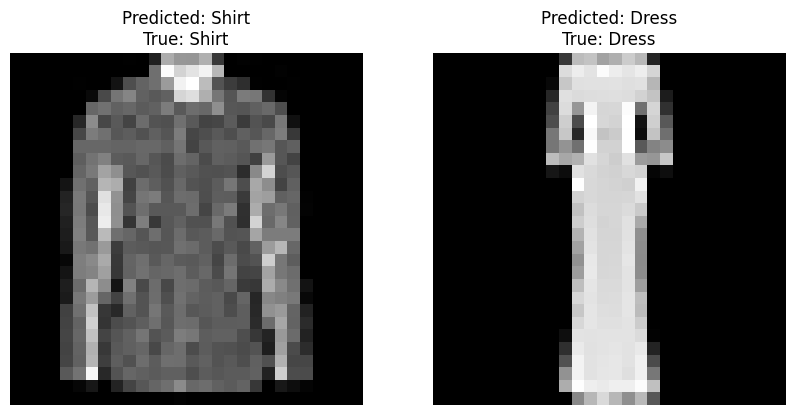

In [17]:
# Display the images and predictions
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\n"
              f"True: {class_names[true_classes[i]]}")
    plt.axis('off')
plt.show()

In [18]:
# Print prediction details
for i in range(2):
    print(f"\nImage {i+1}:")
    print(f"Predicted class: {class_names[predicted_classes[i]]}")
    print(f"True class: {class_names[true_classes[i]]}")
    print(f"Prediction probabilities: {predictions[i]}")


Image 1:
Predicted class: Shirt
True class: Shirt
Prediction probabilities: [3.0455686e-04 1.5160599e-06 2.4909081e-03 3.3779739e-04 2.8048344e-02
 1.0469571e-06 9.6880829e-01 2.9741966e-07 6.4848746e-06 6.5764544e-07]

Image 2:
Predicted class: Dress
True class: Dress
Prediction probabilities: [2.5467826e-03 7.8272477e-02 9.6495438e-05 9.1725934e-01 6.7965023e-04
 1.1886120e-04 5.6421821e-04 7.8133945e-07 2.9938869e-04 1.6204096e-04]
